A partir de los datos de iris:

Ejercicio 1:

- Carga los datos originales
- Utiliza PCA para reducir la dimensionalidad de los datos. No reemplaces X con el resultado, crea una nueva X_pca. Utiliza PCA(2) y otra con PCA(3)
- Utiliza Kmeans para agrupar y predecir las clases de los nuevos datos.
- Compara los resultados para PCA(2) y PCA(3) con las clases originales (y_real).
- ¿Es mejor PCA(2) o PCA(3)?

Ejercicio 2: 

- Repite el proceso con T-SNE y DBSCAN. ¿Cuál da mejores resultados?


In [51]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [52]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target


In [53]:
print("X:", X.shape)
print("y:", y.shape)
#Como se puede observar, tiene 4 dimensiones.

X: (150, 4)
y: (150,)


In [54]:
pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)

In [55]:
X_pca_2 = pca_2.fit_transform(X)
X_pca_3 = pca_3.fit_transform(X)

In [56]:
print("X_pca_2:", X_pca_2.shape)
print("X_pca_3:", X_pca_3.shape)

X_pca_2: (150, 2)
X_pca_3: (150, 3)


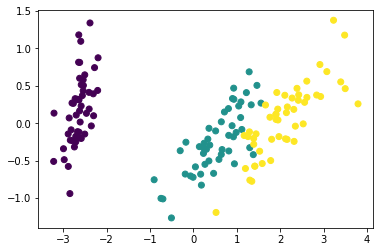

In [57]:
import matplotlib.pyplot as plt
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y)

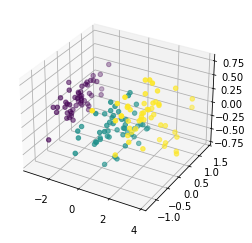

In [58]:
fig = plt.figure()

ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], c=y)
plt.show()

In [59]:
#Podemos visualizar que PCA funciona correctamente. A continuación, buscamos el mejor número de clusters con kmeans y silhouette.

In [60]:
inertias_2 = []
silhouettes_2 = []

print("Para PCA(2)")
print("\n\n")

for k in range(2,10):
    print("Iteración k=",k)
    print("\n")
    kmeans_2 = KMeans(n_clusters=k, random_state=42).fit(X_pca_2)
    kmeans_k_list_2.append(k)
    inertias_2.append(kmeans_2.inertia_)
    silhouettes_2.append(silhouette_score(X_pca_2, kmeans_2.labels_))
    print("Inertia:",kmeans_2.inertia_)
    print("Silhouette score:",silhouette_score(X_pca_2, kmeans_2.labels_))
    print("\n######################\n")

Para PCA(2)



Iteración k= 2


Inertia: 137.15530112818416
Silhouette score: 0.7056703225102109

######################

Iteración k= 3


Inertia: 63.81994202200124
Silhouette score: 0.5976764219547991

######################

Iteración k= 4


Inertia: 42.22517564743002
Silhouette score: 0.5577409232246783

######################

Iteración k= 5


Inertia: 33.480235063216476
Silhouette score: 0.5515547785513799

######################

Iteración k= 6


Inertia: 26.12959354919589
Silhouette score: 0.44412097601443284

######################

Iteración k= 7


Inertia: 22.040908240189058
Silhouette score: 0.4335181949227466

######################

Iteración k= 8


Inertia: 17.930825252674545
Silhouette score: 0.45285311349564417

######################

Iteración k= 9


Inertia: 15.770109504558608
Silhouette score: 0.44356967604920916

######################



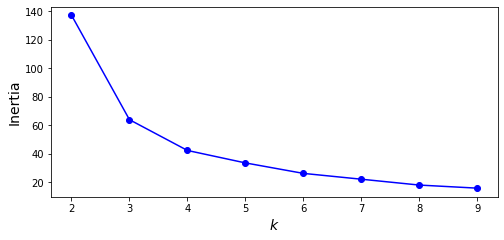

In [61]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 10), inertias_2, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.show()

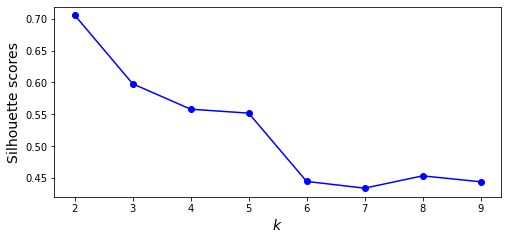

In [62]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 10), silhouettes_2, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette scores", fontsize=14)

plt.show()

In [63]:
inertias_3 = []
silhouettes_3 = []

print("Para PCA(3)")

for kk in range(2,10):
    print("Iteración k=",kk)
    print("\n")
    kmeans_3 = KMeans(n_clusters=kk, random_state=42).fit(X_pca_3)
    kmeans_k_list_3.append(kk)
    inertias_3.append(kmeans_3.inertia_)
    silhouettes_3.append(silhouette_score(X_pca_3, kmeans_3.labels_))
    print("Inertia:",kmeans_3.inertia_)

    print("\n######################\n")

Para PCA(3)
Iteración k= 2


Inertia: 148.79893436516974

######################

Iteración k= 3


Inertia: 75.31893784137085

######################

Iteración k= 4


Inertia: 53.75238528149716

######################

Iteración k= 5


Inertia: 43.245715298825445

######################

Iteración k= 6


Inertia: 35.84267708079659

######################

Iteración k= 7


Inertia: 31.075959971402735

######################

Iteración k= 8


Inertia: 26.84394468996873

######################

Iteración k= 9


Inertia: 25.149056276298268

######################



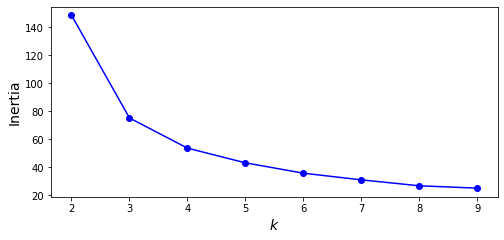

In [64]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 10), inertias_3, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.show()

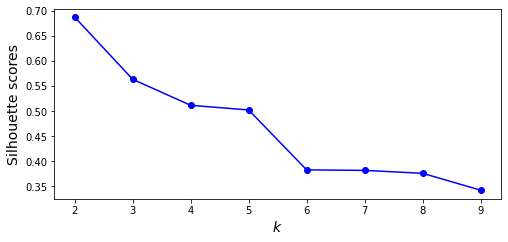

In [65]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 10), silhouettes_3, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette scores", fontsize=14)

plt.show()

In [66]:
#El mejor valor para K es 3 en ambos porque a partir de 3 se estabilizan los scores tanto de inercia como de "silhouette"

In [67]:
kmeans_2 = KMeans(n_clusters=3, random_state=42).fit(X_pca_2)
y_pred_2 = kmeans_2.predict(X_pca_2)
print("Accuracy para PCA(2) con n_clusters=3:",accuracy_score(y_pred_2, y))

Accuracy para PCA(2) con n_clusters=3: 0.09333333333333334


In [68]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
y_pred_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [70]:
#Los clusters no dan los valores de a como los encuentro en y_real, cambio los números manualmente para que corresponda con el ejercicio. Ya que es un algoritmo de clase no supervisada y no deberíamos contar con una y previa.kmeans

In [71]:
for n, i in enumerate(y_pred_2):
    if i == 0:
        y_pred_2[n] = 2
    if i == 1:
        y_pred_2[n] = 0
    if i == 2:
        y_pred_2[n] = 1
y_pred_2      

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [72]:
print("Accuracy para PCA(2) con n_clusters=3:",accuracy_score(y_pred_2, y))

Accuracy para PCA(2) con n_clusters=3: 0.8866666666666667


In [73]:
kmeans_3 = KMeans(n_clusters=3, random_state=42).fit(X_pca_3)
y_pred_3 = kmeans_3.predict(X_pca_3)

In [74]:
print("Accuracy para PCA(3) con n_clusters=3:",accuracy_score(y_pred_3, y))

Accuracy para PCA(3) con n_clusters=3: 0.24


In [75]:
y_pred_3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [76]:
for n, i in enumerate(y_pred_3):
    if i == 0:
        y_pred_3[n] = 1
    if i == 1:
        y_pred_3[n] = 0
    if i == 2:
        y_pred_3[n] = 2


In [77]:
print("Accuracy para PCA(3) con n_clusters=3:",accuracy_score(y_pred_3, y))

Accuracy para PCA(3) con n_clusters=3: 0.8933333333333333


In [78]:
#Da mejor accuracy para PCA(3)

In [97]:
#Probamos a utilizar dbscan
from sklearn.preprocessing import StandardScaler
X_db = StandardScaler().fit_transform(X)

In [140]:
db = DBSCAN(eps=0.7,min_samples=3).fit(X_db)
y_pred_db = db.labels_

In [141]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [142]:
y_pred_db

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [143]:
for n, i in enumerate(y_pred_db):
    if i == -1:
        y_pred_db[n] = 2

In [144]:
y_pred_db

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [146]:
print("Accuracy para PCA(3) con n_clusters=3:",accuracy_score(y_pred_db, y))

Accuracy para PCA(3) con n_clusters=3: 0.6866666666666666


In [ ]:
#DBSCAN da valores mucho menores que con KMeans